In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [31]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

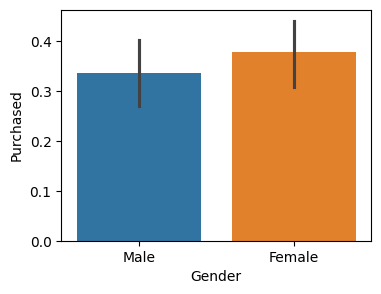

In [33]:
plt.figure(figsize=(4,3))
sns.barplot(x='Gender',y='Purchased',data = df , hue = 'Gender')
plt.show()

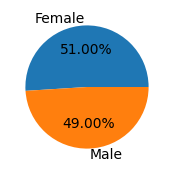

In [34]:
plt.figure(figsize=(2,2))
plt.pie(x=df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%0.2f%%')
plt.show()

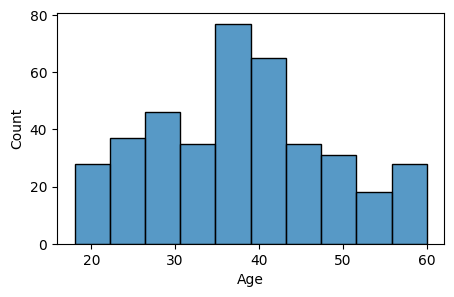

In [35]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='Age')
plt.show()

In [36]:
df['User ID'].nunique()

400

In [37]:
df.drop("User ID",axis = 1, inplace=True)

In [38]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [39]:
from sklearn.preprocessing import LabelEncoder
gender_enc = LabelEncoder()
df['Gender']=gender_enc.fit_transform(df['Gender'])

In [40]:
import pickle
with open("Gender_enc.pkl",'wb') as f:
    pickle.dump(gender_enc,f)
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [41]:
x = df.iloc[:,:3]
y = df.iloc[:,3]
print(x)
print(y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [43]:
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (280, 3)
X_test shape (120, 3)
y_train shape (280,)
y_test shape (120,)


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
with open("dtc_model.pkl",'wb') as f:
    pickle.dump(dtc,f)

In [46]:
y_pred = dtc.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [47]:
print("Actual_data_point",list(y_test[:10]))
print("Predicted",y_pred[:10])

Actual_data_point [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Predicted [1 1 0 0 0 0 1 0 0 1]


In [48]:

import sklearn.metrics as metrics

In [49]:
metrics.confusion_matrix(y_test,y_pred)

array([[70,  9],
       [ 9, 32]])

In [50]:
metrics.accuracy_score(y_test,y_pred)

0.85

In [51]:
with open('dtc_model.pkl','rb') as file:
    model = pickle.load(file)

In [52]:
pred = model.predict([[0,	35,	90000]])
if pred == 0:
    print("Not purchased")
else:
    print("Purchased")   

Not purchased


In [54]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')
rfc.fit(X_train,y_train)




,n_estimators,50
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
rfc_pred = rfc.predict(X_test)
rfc_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
list(y_test[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [57]:
metrics.confusion_matrix(y_test,rfc_pred)


array([[72,  7],
       [ 8, 33]])

In [58]:
metrics.accuracy_score(y_test,rfc_pred)


0.875

In [59]:
with open('Randomforestmodel.pkl','wb') as f:
    pickle.dump(rfc,f)